# Unemployment in India: A Data-Driven Analysis of the Covid-19 Impact

This project investigates the trends and factors influencing unemployment in India, with a focus on the sharp increase during the Covid-19 pandemic. Using time-series and comparative analysis, it aims to understand regional disparities, urban-rural differences, and correlations with labor participation. This analysis provides insights into the pandemic's economic impact, informing future strategies for employment and workforce management in India.

Code by VIKRAM RAWAT

# 1.Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Load the Dataset

In [2]:
n = pd.read_csv('Unemployment in India - Unemployment in India.csv')
n

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


1. **Region**: Specifies the geographical area or state within India where the unemployment data is collected.

2. **Date**: Indicates the date for which the unemployment data is recorded, allowing for time-based analysis.

3. **Frequency**: Represents how often the unemployment data is reported, such as monthly, quarterly, or annually.

4. **Estimated Unemployment Rate (%)**: The percentage of the labor force that is unemployed, providing a measure of economic health and job availability.

5. **Estimated Employed**: The estimated number of individuals who are currently employed in the given region, reflecting workforce engagement.

6. **Estimated Labour Participation Rate (%)**: The percentage of the working-age population that is either employed or actively seeking employment, indicating the level of labor market engagement.

7. **Area**: Categorizes the data into urban or rural classifications, helping to analyze unemployment trends based on geographic characteristics. 

These descriptions provide a foundational understanding of the data structure and its relevance to unemployment analysis in India.

# 3.Data Preprocessing

In [3]:
n.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [4]:
n1 = n.dropna()
n1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [5]:
n1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [6]:
n1.drop_duplicates()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [7]:
n1.duplicated().sum()

0

In [8]:
n1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
n1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
n1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [11]:
n1 = n1.copy()
n1['Date'] = pd.to_datetime(n1['Date'], dayfirst=True, errors='coerce')

In [12]:
n1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [13]:
n1.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


# 1. Time Series Analysis of Unemployment Rate

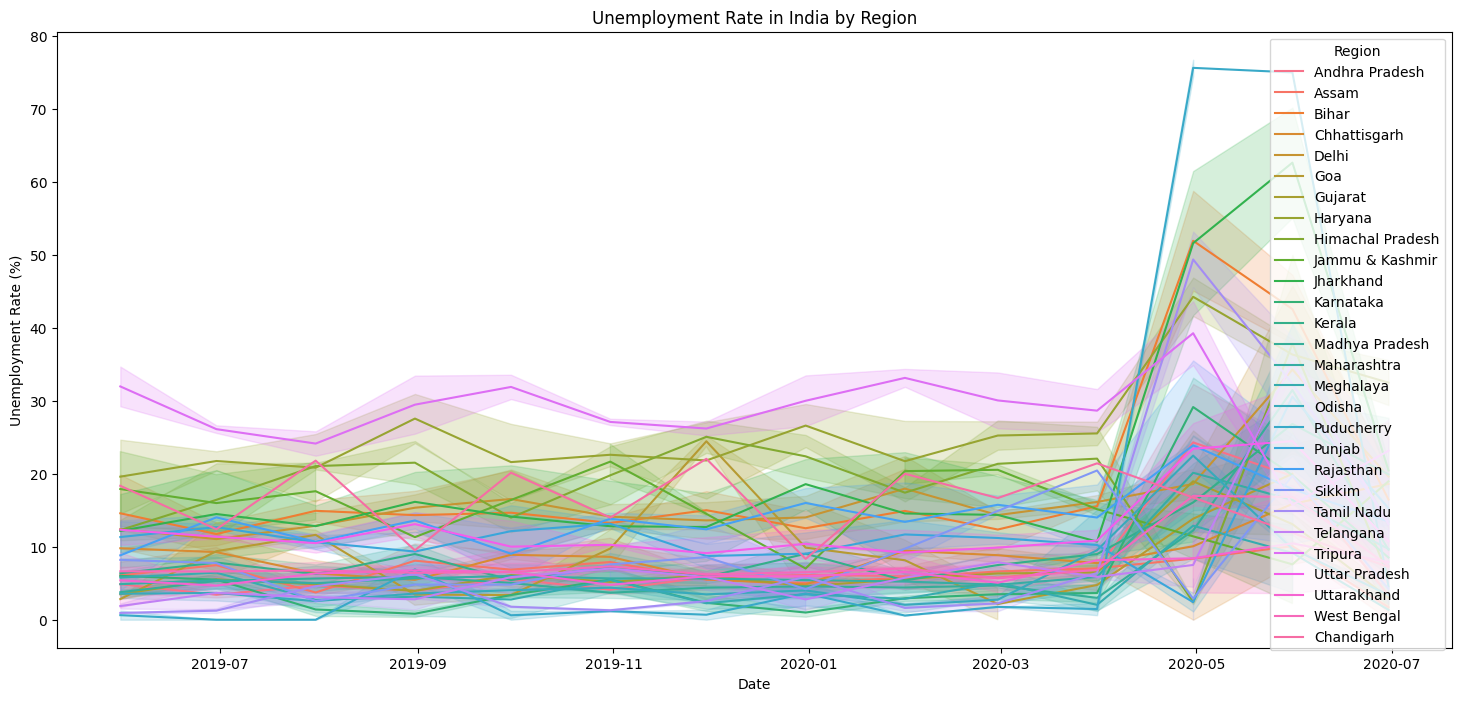

In [14]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=n1 , x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate in India by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title='Region', loc='upper right')
plt.show()

# 2. Comparing Unemployment Rate Across Regions

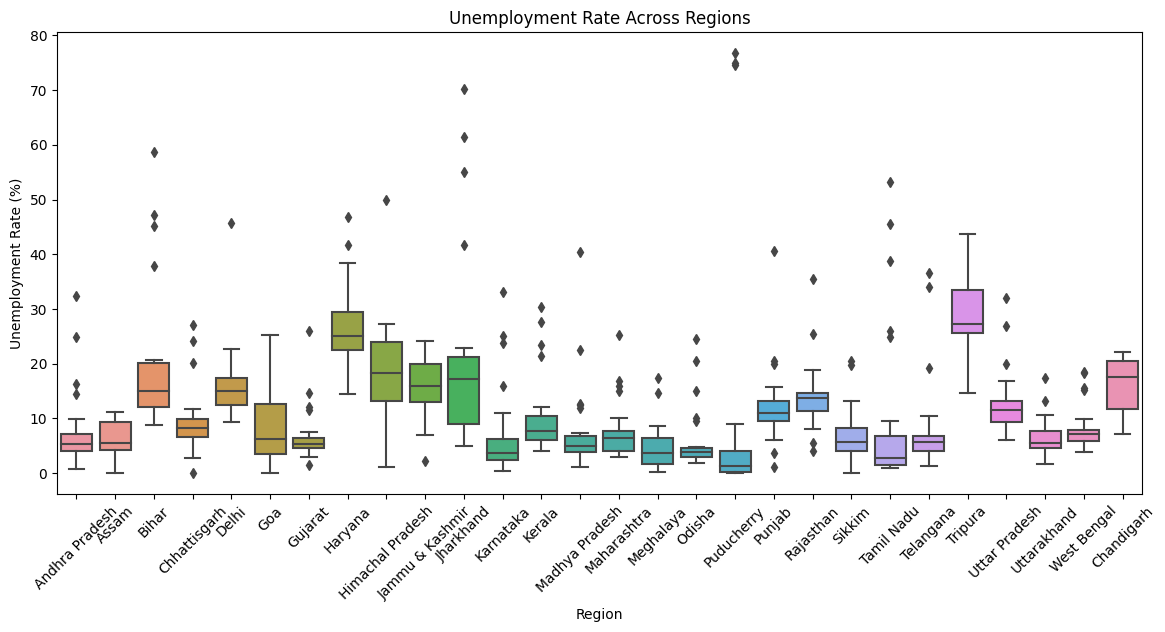

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=n1 , x='Region', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Across Regions")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

# 3. Average Unemployment Rate by Region

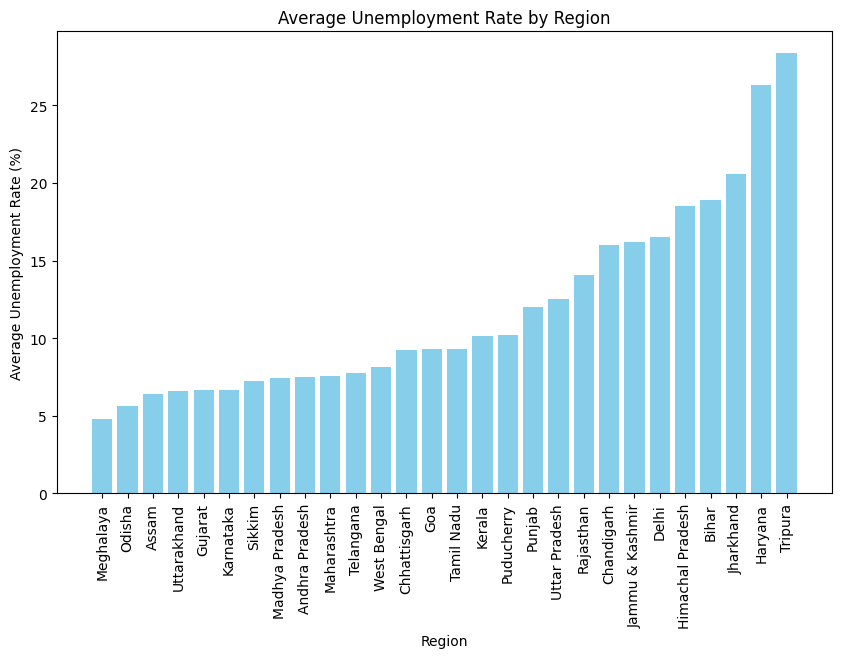

In [16]:
region_avg = n1.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.bar(region_avg.index, region_avg.values, color='skyblue')
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

# 4.Unemployment Rate by Region and Area

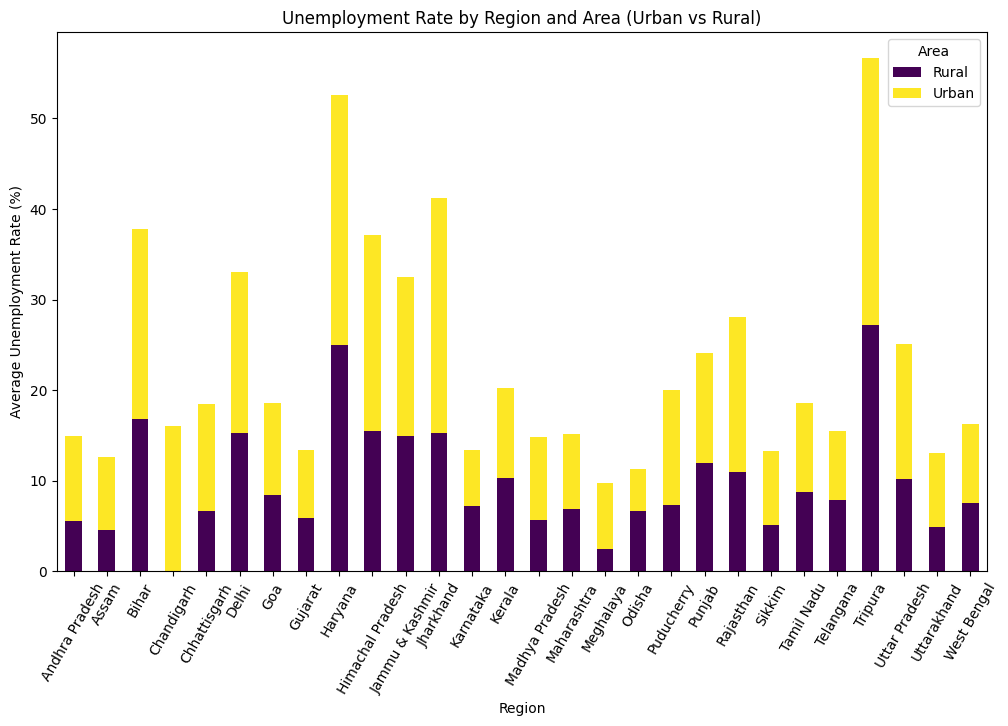

In [17]:
region_area_data = n1.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().unstack()
region_area_data.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="viridis")
plt.title("Unemployment Rate by Region and Area (Urban vs Rural)")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.legend(title='Area')
plt.xticks(rotation=60)
plt.show()

# 5. Distribution of Estimated Employment by Region

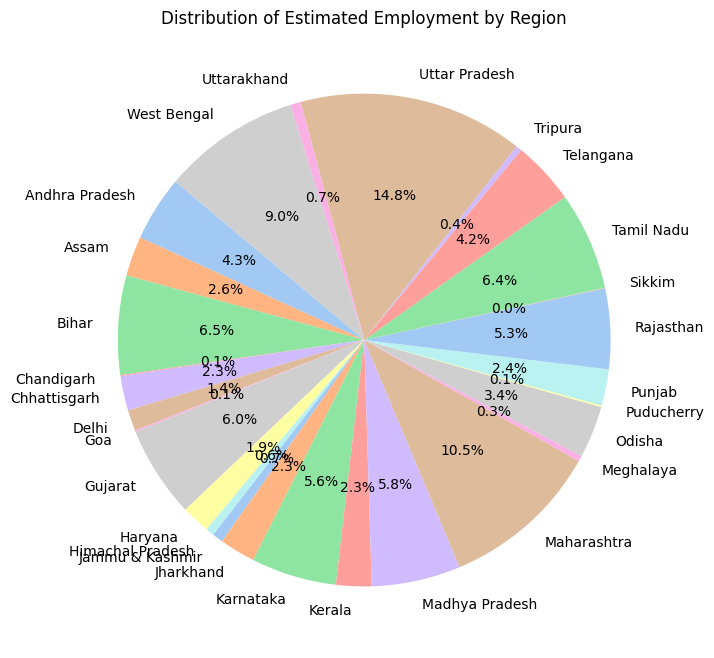

In [18]:
employment_by_region = n1.groupby('Region')['Estimated Employed'].sum()
plt.figure(figsize=(8, 8))
plt.pie(employment_by_region, labels=employment_by_region.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Estimated Employment by Region")
plt.show()

# 6. Analyzing Employment Estimates Over Time

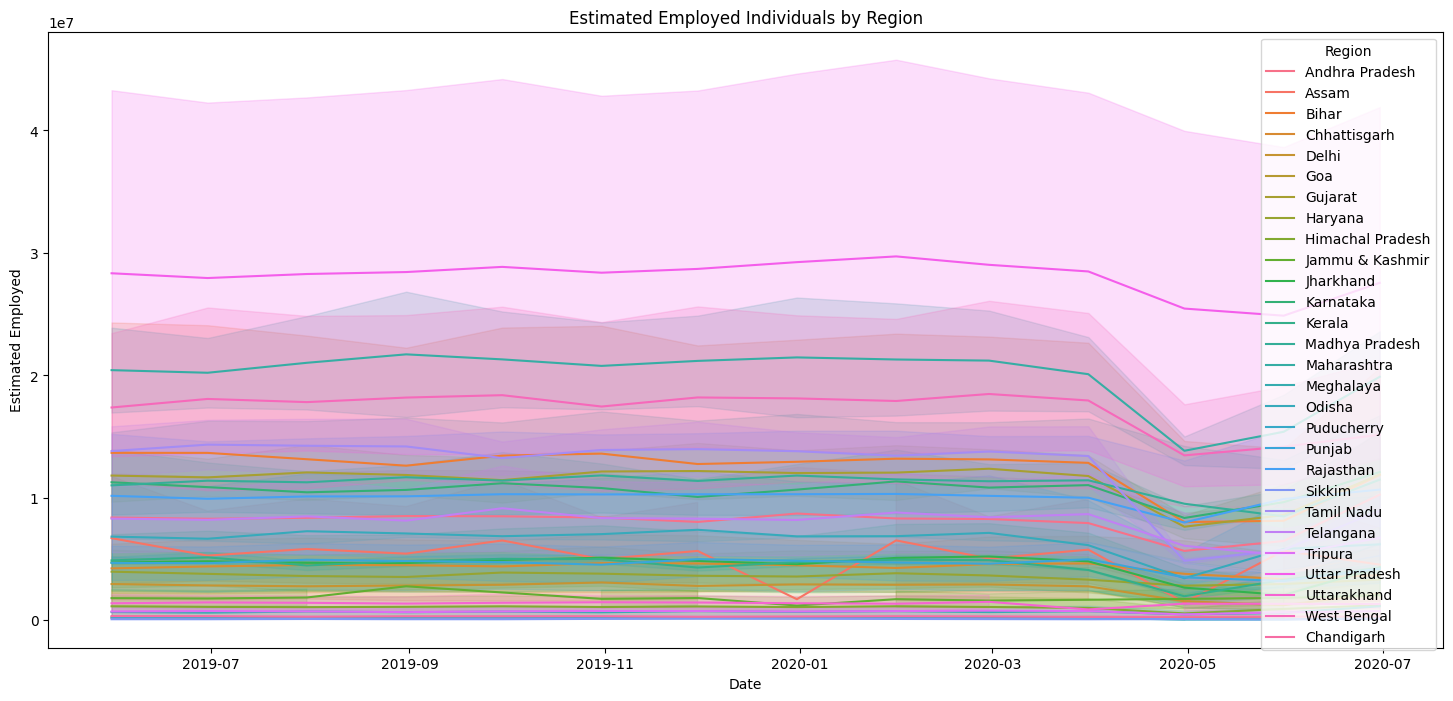

In [19]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=n1 , x='Date', y='Estimated Employed', hue='Region')
plt.title("Estimated Employed Individuals by Region")
plt.xlabel("Date")
plt.ylabel("Estimated Employed")
plt.legend(title='Region', loc='upper right')
plt.show()

# 7. Labor Participation Rate Analysis

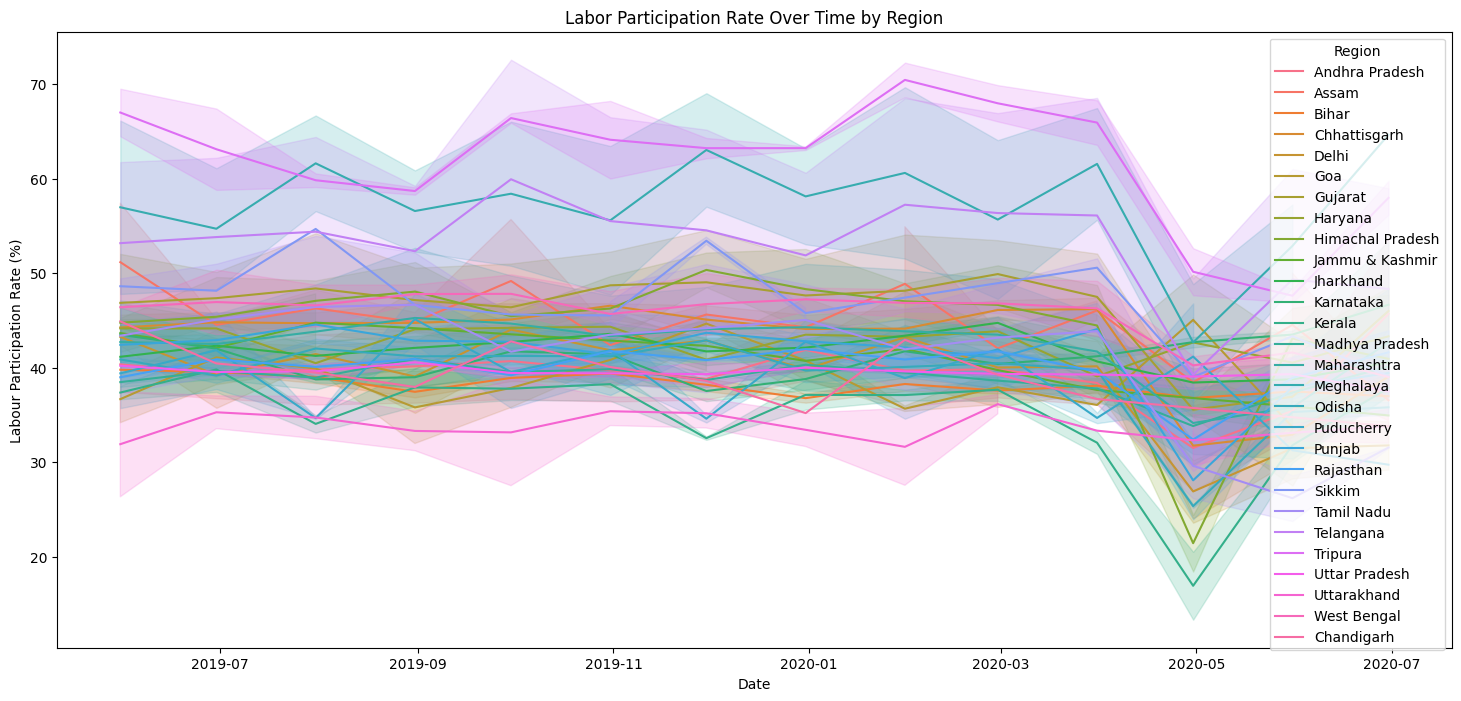

In [20]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=n1, x='Date', y='Estimated Labour Participation Rate (%)', hue='Region')
plt.title("Labor Participation Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Labour Participation Rate (%)")
plt.legend(title='Region', loc='upper right')
plt.show()

# 8. Urban vs Rural Unemployment Rate

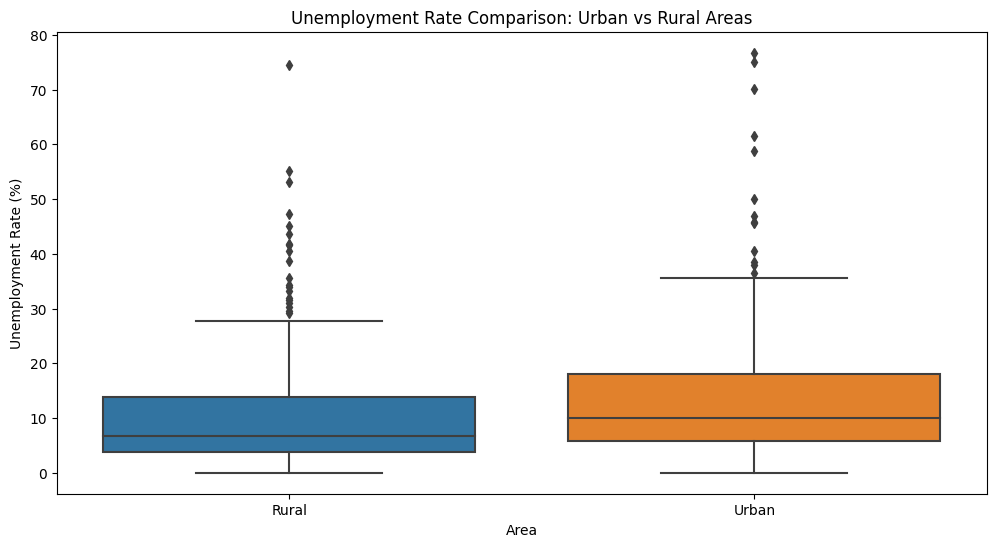

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= n1, x='Area', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison: Urban vs Rural Areas")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()

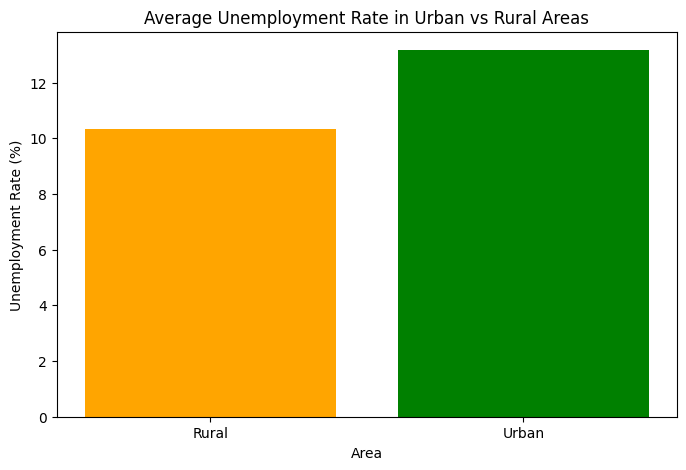

In [22]:
area_avg = n1.groupby('Area')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(8, 5))
plt.bar(area_avg.index, area_avg.values, color=['orange', 'green'])
plt.title("Average Unemployment Rate in Urban vs Rural Areas")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# 9. Statistical Analysis

In [23]:
# lets assume Covid period (March 2020 to December 2021)
covid_period = (n1['Date'] >= '2020-03-01') & (n1['Date'] <= '2021-12-31')
pre_covid = n1[n1['Date'] < '2020-03-01']
during_covid = n1[covid_period]

### A. Calculate Average Unemployment Rate before and during Covid

In [24]:
pre_covid_avg = pre_covid['Estimated Unemployment Rate (%)'].mean()
print(f"\nAverage Unemployment Rate Before Covid-19: {pre_covid_avg:.2f}%")


Average Unemployment Rate Before Covid-19: 9.51%


In [25]:
during_covid_avg = during_covid['Estimated Unemployment Rate (%)'].mean()
print(f"Average Unemployment Rate During Covid-19: {during_covid_avg:.2f}%")

Average Unemployment Rate During Covid-19: 17.77%


In [26]:
print(f"Percentage Increase Due to Covid-19: {((during_covid_avg - pre_covid_avg) / pre_covid_avg * 100):.2f}%")

Percentage Increase Due to Covid-19: 86.91%


### B. Monthly trend of unemployment rate

In [27]:
# Create 'Month_Year' column
n1.loc[:, 'Month_Year'] = n1['Date'].dt.to_period('M')

# Group by 'Month_Year' and calculate the monthly average of numeric columns
monthly_data = n1.groupby('Month_Year').mean(numeric_only=True)

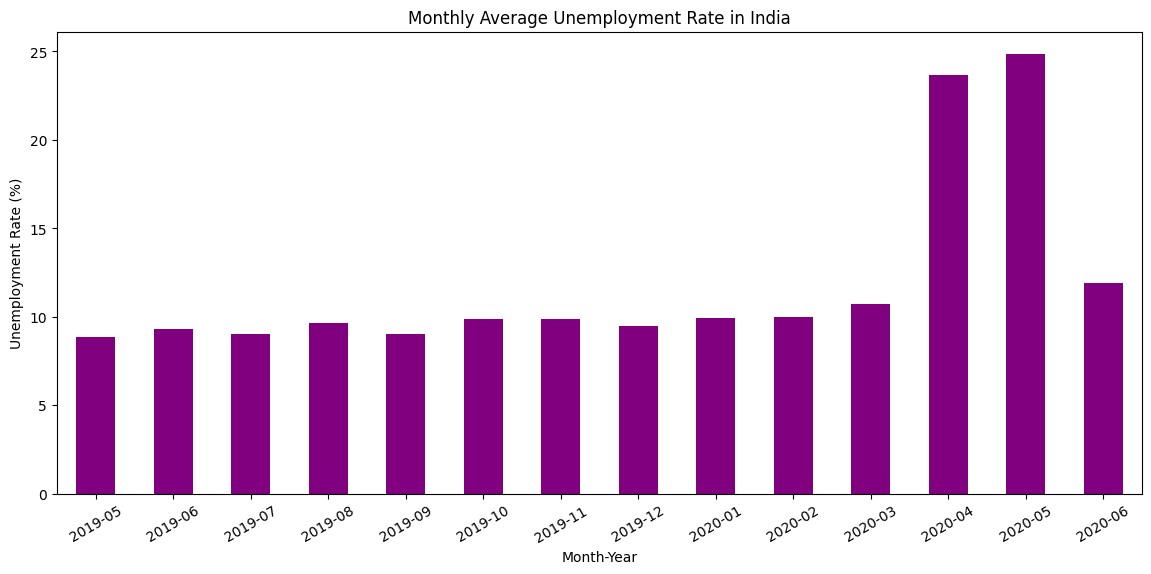

In [28]:
# Plotting the monthly trend of unemployment rate
plt.figure(figsize=(14, 6))
monthly_data['Estimated Unemployment Rate (%)'].plot(kind='bar', color='purple')
plt.title("Monthly Average Unemployment Rate in India")
plt.xlabel("Month-Year")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=30)
plt.show()

# 9. Employment and Labor Participation Rate Correlation

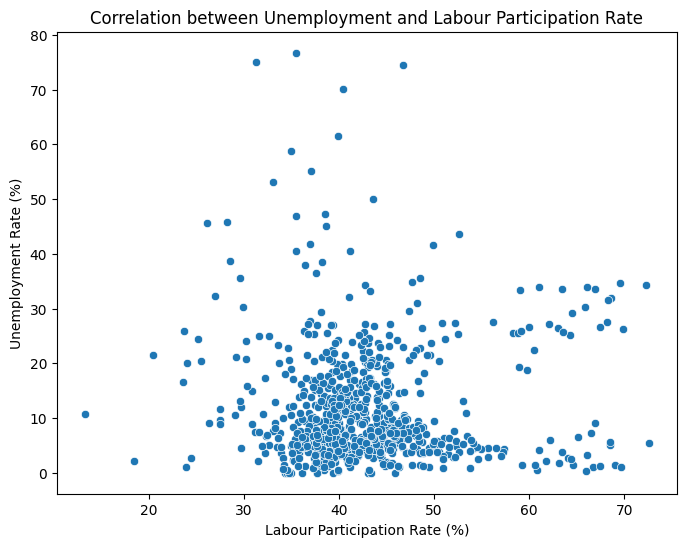

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=n1, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)')
plt.title("Correlation between Unemployment and Labour Participation Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [30]:
correlation = n1['Estimated Unemployment Rate (%)'].corr(n1['Estimated Labour Participation Rate (%)'])
print(f"\nCorrelation between Unemployment Rate and Labour Participation Rate: {correlation:.2f}")


Correlation between Unemployment Rate and Labour Participation Rate: 0.00


# 10. Scatter Plot with Trend Line of Unemployment Rate vs Labour Participation Rate

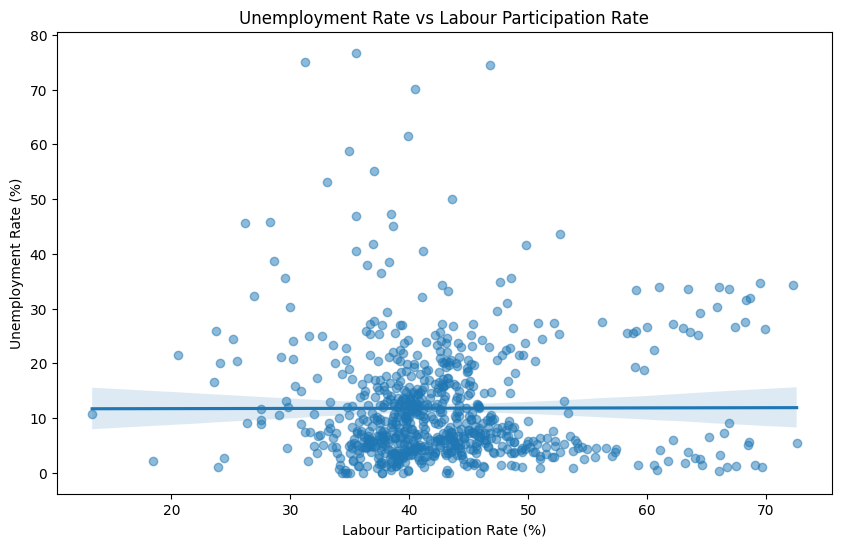

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(data=n1, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', scatter_kws={'alpha':0.5})
plt.title("Unemployment Rate vs Labour Participation Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

# 11. Heatmap of Region vs Month-Year for Unemployment Rate

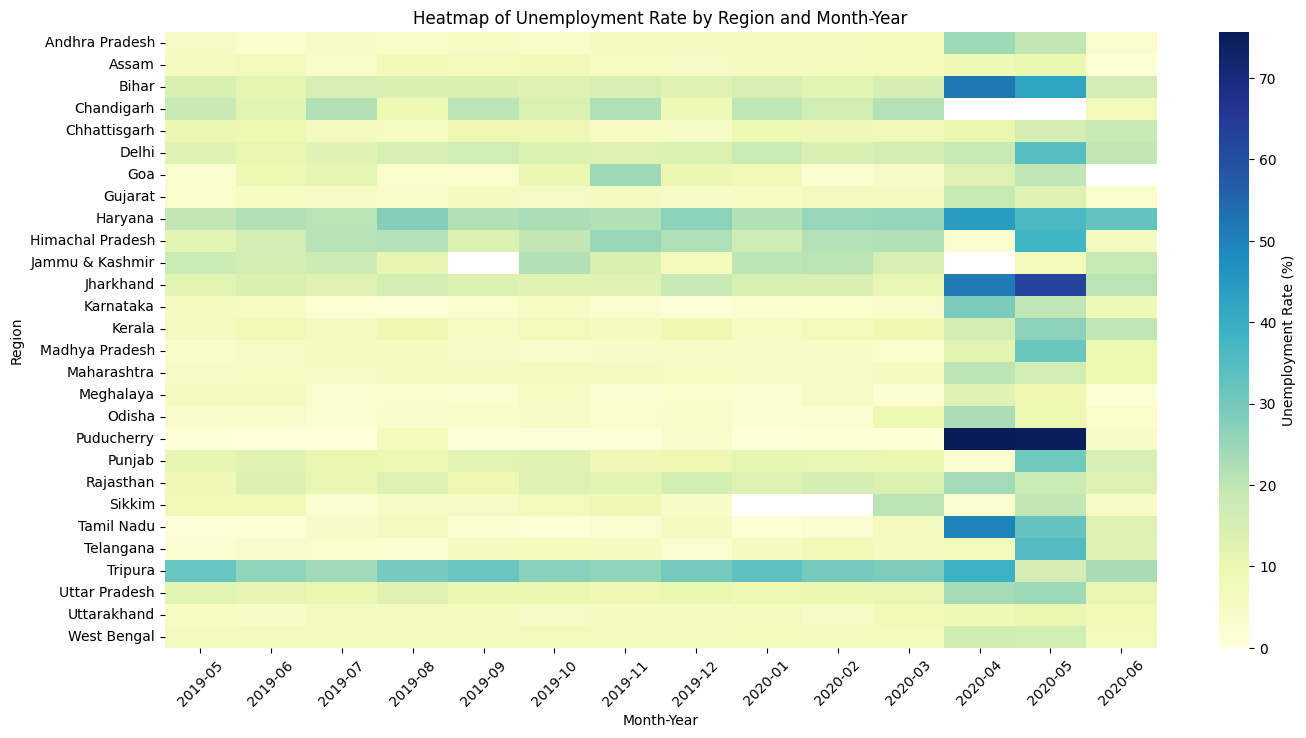

In [32]:
region_monthly_data = n1.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Month_Year', aggfunc='mean')
plt.figure(figsize=(16, 8))
sns.heatmap(region_monthly_data, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Unemployment Rate (%)'})
plt.title("Heatmap of Unemployment Rate by Region and Month-Year")
plt.xlabel("Month-Year")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.show()


# 12. Regional Distribution of Labour Participation Rate

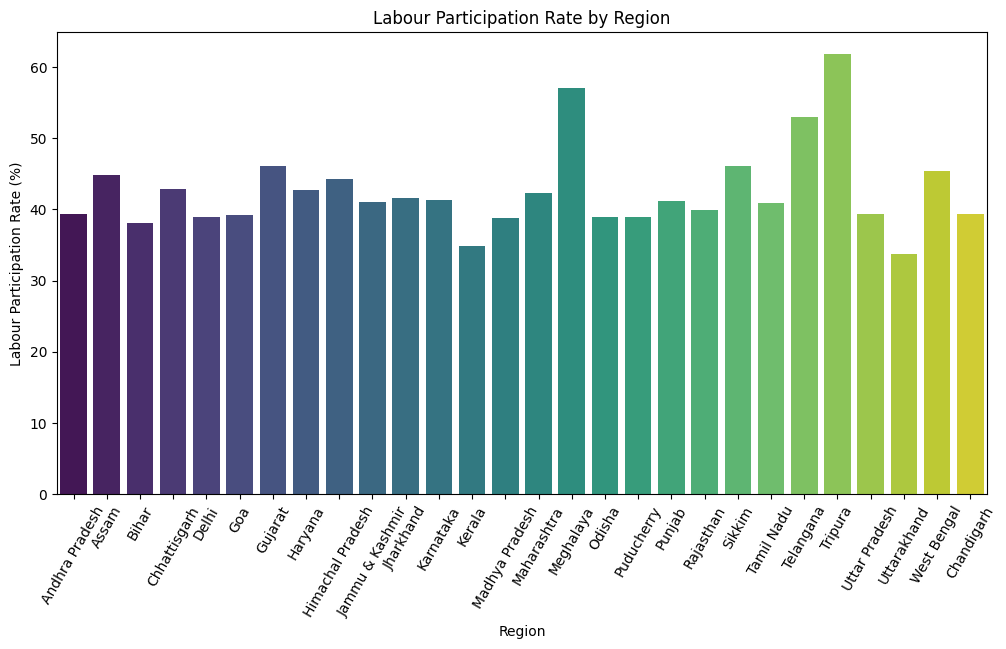

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=n1, x='Region', y='Estimated Labour Participation Rate (%)', errorbar=None, palette='viridis')
plt.title("Labour Participation Rate by Region")
plt.xlabel("Region")
plt.ylabel("Labour Participation Rate (%)")
plt.xticks(rotation=60)
plt.show()

# 13. Visualize Covid Impact using a bar graph

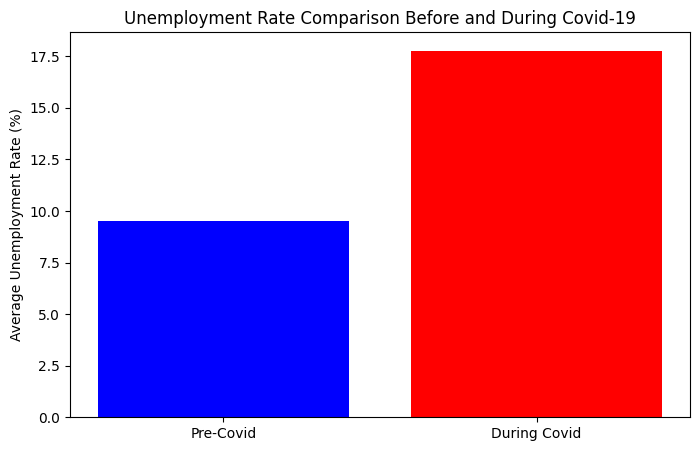

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(['Pre-Covid', 'During Covid'], [pre_covid_avg, during_covid_avg], color=['blue', 'red'])
plt.title("Unemployment Rate Comparison Before and During Covid-19")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()


### Summary of Unemployment Analysis in India

This analysis focused on the unemployment situation in India, particularly during the Covid-19 pandemic, using a dataset with columns **Region**, **Date**, **Frequency**, **Estimated Unemployment Rate (%)**, **Estimated Employed**, and **Estimated Labour Participation Rate (%)**, **Area**.

1. **Data Overview**:
   - Basic exploratory data analysis (EDA) provided insights into the dataset, including previews and summary statistics.

2. **Time Series Analysis**:
   - A line plot was created to visualize the **trends in the unemployment rate** over time across different regions. This helped identify patterns before, during, and after the Covid-19 period.

3. **Comparative Analysis**:
   - **Bar Graphs**:
     - Average unemployment rates by region were displayed using bar graphs.
     - A stacked bar chart illustrated unemployment rates categorized by region and area (urban vs rural).
   - **Pie Chart**:
     - A pie chart showcased the distribution of estimated employment by region, highlighting the proportion of employed individuals in different areas.
 
4. **Analyzing Employment Estimates Over Time**:
   - Analyzing Employment Estimates Over Time involves examining trends and patterns in the number of employed individuals across different time periods to understand workforce dynamics.
   
5. **Trends and Monthly Analysis**:
   - A bar chart illustrated the **monthly average unemployment rate** in India, helping to identify seasonal trends and spikes during the Covid-19 period.

6. **Heatmap**:
   - A heatmap was created to represent unemployment rates across different regions and months, facilitating the identification of trends over time.

7. **Correlation Analysis**:
   - A scatter plot was generated to examine the relationship between the **Labour Participation Rate and the Unemployment Rate**, revealing a correlation of **0.00**, indicating no linear relationship between the two variables.

8. **Impact of Covid-19**:
   - The average unemployment rates were compared before and during the Covid-19 pandemic. The analysis revealed:
     - Average Unemployment Rate Before Covid-19: 9.51
     - Average Unemployment Rate During Covid-19: 17.77
     - Percentage Increase Due to Covid-19: 86.91
   - A bar graph visualized this comparison, emphasizing the impact of the pandemic on unemployment.

### Conclusion
The analysis provided a comprehensive overview of unemployment trends in India, emphasizing the severe impact of Covid-19 while revealing no significant correlation between labour participation and unemployment rates.